<a href="https://colab.research.google.com/github/anu04596/algo-efficiency-mini-project-Anu/blob/main/Sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import random
import matplotlib.pyplot as plt

Bubble Sort

In [36]:
def bubble_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        for j in range(n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
    return a

Insertion Sort

In [3]:
def insertion_sort(arr):
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and key < a[j]:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

Selection Sort

In [4]:
def selection_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

Merge Sort

In [5]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

Quick Sort

In [6]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

Measure Time

In [31]:
def measure_time(sort_func, arr_sizes):
    times = []
    for n in arr_sizes:
        arr = [random.randint(0, 10000) for _ in range(n)]
        start = time.time()
        sort_func(arr)
        end = time.time()
        times.append(end - start)
    return times

In [45]:
arr_sizes = [100,400,800,1000,1200]

In [46]:
bubble_times = measure_time(bubble_sort, arr_sizes)
selection_times = measure_time(selection_sort, arr_sizes)
insertion_times = measure_time(insertion_sort, arr_sizes)
merge_times = measure_time(merge_sort, arr_sizes)
quick_times = measure_time(quick_sort, arr_sizes)

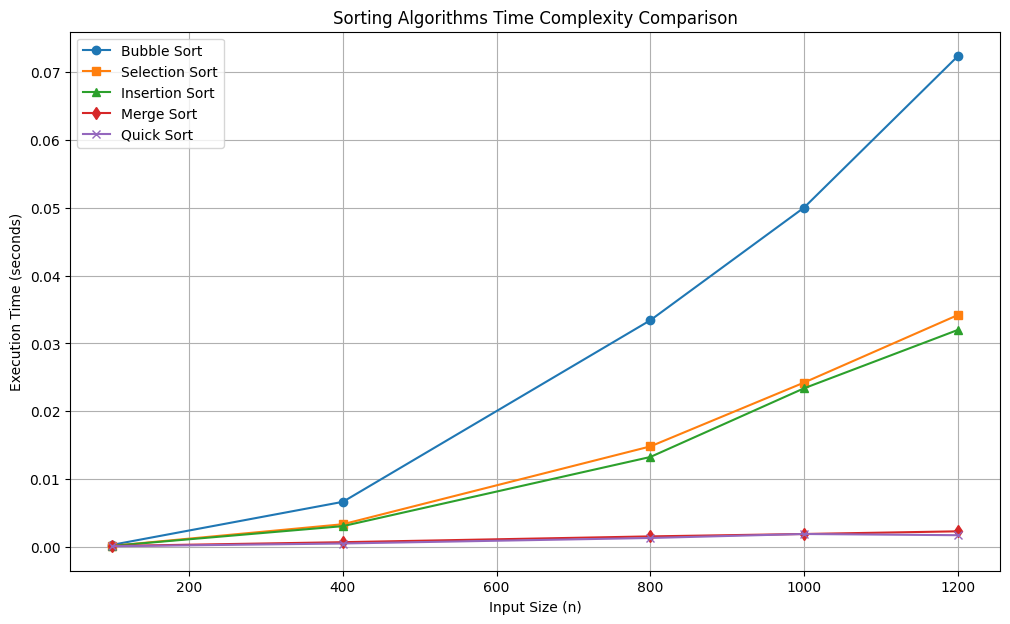

In [47]:
plt.figure(figsize=(12,7))
plt.plot(arr_sizes, bubble_times, label="Bubble Sort ", marker='o')
plt.plot(arr_sizes, selection_times, label="Selection Sort", marker='s')
plt.plot(arr_sizes, insertion_times, label="Insertion Sort", marker='^')
plt.plot(arr_sizes, merge_times, label="Merge Sort", marker='d')
plt.plot(arr_sizes, quick_times, label="Quick Sort", marker='x')

plt.title("Sorting Algorithms Time Complexity Comparison")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.ylim()
plt.grid(True)
plt.show()
